#Comparative Analysis of Machine Learning and Deep Learning Algorithms for Credit Card Fraud Detection: A Multi-Dataset Approach
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
Attribute	Representation

**Unnamed:**0	 An index column, possibly representing a unique identifier for each row

**trans_date_trans_time:** The date and time of the transaction

**cc_num:** 	The credit card number used for the transaction

**merchant:**	The name of the merchant where the transaction took place

**category:**	The category of the transaction (e.g., grocery, travel, etc.)
amt	The amount of the transaction

**first:**	The first name of the cardholder

**last:**	The last name of the cardholder

**gender:**	The gender of the cardholder

**street:**	The street address of the cardholder

**city:**	The city of the cardholder

**state:**	The state of the cardholder

**zip:**	The zip code of the cardholder

**lat:**	The latitude of the cardholder's location

**long:**	The longitude of the cardholder's location

**city_pop:**	The population of the city where the cardholder resides

**job:**	The occupation or job title of the cardholder

**dob:**	The date of birth of the cardholder

**trans_num:**	A unique identifier for each transaction

**unix_time:** 	The transaction time in UNIX timestamp format

**merch_lat:**	The latitude of the merchant's location

#Objective:
 The primary objective of this study is to build and evaluate predictive models capable of identifying fraudulent credit card transactions with high accuracy, while minimizing false positives and false negatives. This involves the application of various machine learning and deep learning techniques to effectively handle the imbalanced nature of the dataset and capture intricate patterns associated with fraudulent activities.
#Approach:

1.	Data Exploration, Comprehension, and Visualization
2.	Data Preprocessing for Model Development
3.	Constructing the Model
4.	Assessing Model Performance


In [ ]:
#importing required packages

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building
#algorithms for sampling

from imblearn.over_sampling import SMOTE

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

In [ ]:
#loading the dataset
fraud_train = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')

#concatenating the two datasets
df = pd.concat([fraud_train, fraud_test]).reset_index()

df.drop(df.columns[:2], axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495.000000,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018.000000,36.011293,-82.048315,0.000000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149.000000,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044.000000,49.159047,-118.186462,0.000000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154.000000,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051.000000,43.150704,-112.154481,0.000000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939.000000,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076.000000,47.034331,-112.561071,0.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99.000000,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186.000000,38.674999,-78.632459,0.000000


In [ ]:
#let us look at the number of unique values in the dataset
df.nunique()

trans_date_trans_time    1588025
cc_num                       982
merchant                     693
category                      14
amt                        57277
first                        351
last                         484
gender                         2
street                       982
city                         892
state                         51
zip                          968
lat                          967
long                         966
city_pop                     878
job                          496
dob                          967
trans_num                1617117
unix_time                1588056
merch_lat                1541779
merch_long               1584395
is_fraud                       2
dtype: int64

In [ ]:
import pandas as pd

# Assuming you have already loaded the DataFrame 'df' from the Excel file

# Convert 'trans_date_trans_time' column to datetime type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Derive additional columns from 'trans_date_trans_time'
# Deriving hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Deriving 'day of the week'
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Deriving 'year_month'
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Now you can use df.head() to check the DataFrame with the new columns
print(df.head())


  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley G

In [ ]:
#finding age
#converting 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] -
                      df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0   31.000000
1   41.000000
2   57.000000
3   52.000000
4   33.000000
Name: age, dtype: float64

In [ ]:
#dropping variables
df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495.000000,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018.000000,36.011293,-82.048315,0.000000,0,Tuesday,2019-01,31.000000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149.000000,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044.000000,49.159047,-118.186462,0.000000,0,Tuesday,2019-01,41.000000
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154.000000,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051.000000,43.150704,-112.154481,0.000000,0,Tuesday,2019-01,57.000000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939.000000,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076.000000,47.034331,-112.561071,0.000000,0,Tuesday,2019-01,52.000000
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99.000000,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186.000000,38.674999,-78.632459,0.000000,0,Tuesday,2019-01,33.000000


In [ ]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617118 entries, 0 to 1617117
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1617118 non-null  int64    
 1   merchant           1617118 non-null  object   
 2   category           1617118 non-null  object   
 3   amt                1617118 non-null  float64  
 4   gender             1617118 non-null  object   
 5   street             1617118 non-null  object   
 6   city               1617118 non-null  object   
 7   state              1617118 non-null  object   
 8   zip                1617118 non-null  int64    
 9   lat                1617118 non-null  float64  
 10  long               1617117 non-null  float64  
 11  city_pop           1617117 non-null  float64  
 12  job                1617117 non-null  object   
 13  trans_num          1617117 non-null  object   
 14  unix_time          1617117 non-null  float64  
 15

In [ ]:
#storing a copy
df_org = df.copy()

#Step - 3: Exploratory Data Analysis

In [ ]:
#determing the shape of the dataset
df.shape

(1617118, 22)

In [ ]:
#checking the dataframe
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495.000000,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018.000000,36.011293,-82.048315,0.000000,0,Tuesday,2019-01,31.000000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149.000000,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044.000000,49.159047,-118.186462,0.000000,0,Tuesday,2019-01,41.000000
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154.000000,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051.000000,43.150704,-112.154481,0.000000,0,Tuesday,2019-01,57.000000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939.000000,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076.000000,47.034331,-112.561071,0.000000,0,Tuesday,2019-01,52.000000
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99.000000,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186.000000,38.674999,-78.632459,0.000000,0,Tuesday,2019-01,33.000000


In [ ]:
#describing the dataset
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,age
count,1617118.000000,1617118.000000,1617118.000000,1617118.000000,1617117.000000,1617117.000000,1617117.000000,1617117.000000,1617117.000000,1617117.000000,1617118.000000,1617117.000000
mean,417303345903784448.000000,69.996810,48818.315359,38.536734,-90.229080,88776.295089,1357344327.291223,38.536649,-90.229255,0.005109,12.803152,46.234543
std,1309039559871493376.000000,158.635080,26883.366009,5.071914,13.745951,301761.549648,19090042.963682,5.106319,13.757932,0.071295,6.814842,17.406601
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000,0.000000,14.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,743.000000,1341215600.000000,34.738100,-96.901040,0.000000,7.000000,33.000000
50%,3520550088202337.000000,47.400000,48174.000000,39.354300,-87.476900,2443.000000,1354812261.000000,39.367762,-87.442825,0.000000,14.000000,44.000000
75%,4642255475285942.000000,83.057500,72042.000000,41.940400,-80.158000,20328.000000,1376356219.000000,41.955782,-80.244614,0.000000,19.000000,57.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000,23.000000,96.000000


In [ ]:
#let us check the percentage of fraudulent data points in our dataset
100*df.is_fraud.value_counts(normalize=True)

0.000000   99.489091
1.000000    0.510909
Name: is_fraud, dtype: float64

In [ ]:
#looking at distribution of amount
pd.concat(
    [df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1617118.000000,1608855.000000,8262.000000
1,mean,69.996810,67.629583,530.972522
2,std,158.635080,153.001770,391.730877
3,min,1.000000,1.000000,1.180000
4,50%,47.400000,47.200000,391.165000
5,95%,195.220000,189.610000,1086.293000
6,99.9%,1517.920220,1523.276720,1289.675980
7,max,28948.900000,28948.900000,1371.810000


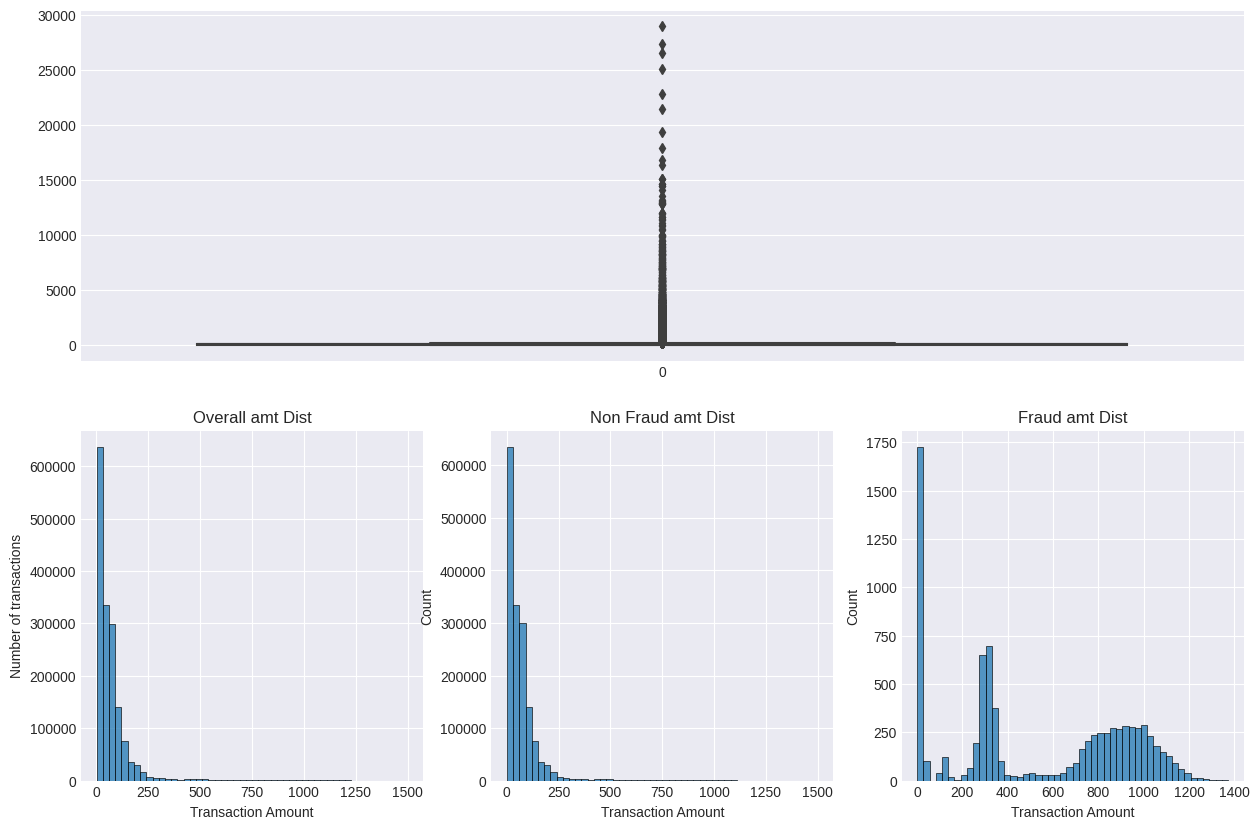

In [ ]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature
#box plot
plots.append(sns.boxplot(df.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

Exploring Time data:


In [ ]:
#year_month vs number of transactions
df_timeline01 = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


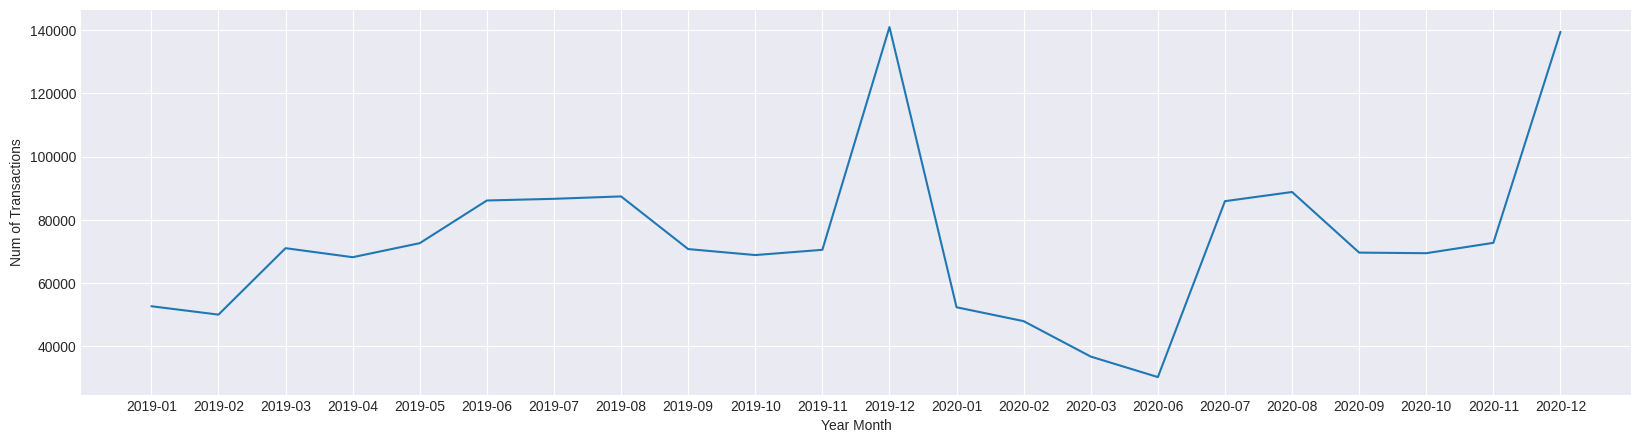

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


In [ ]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


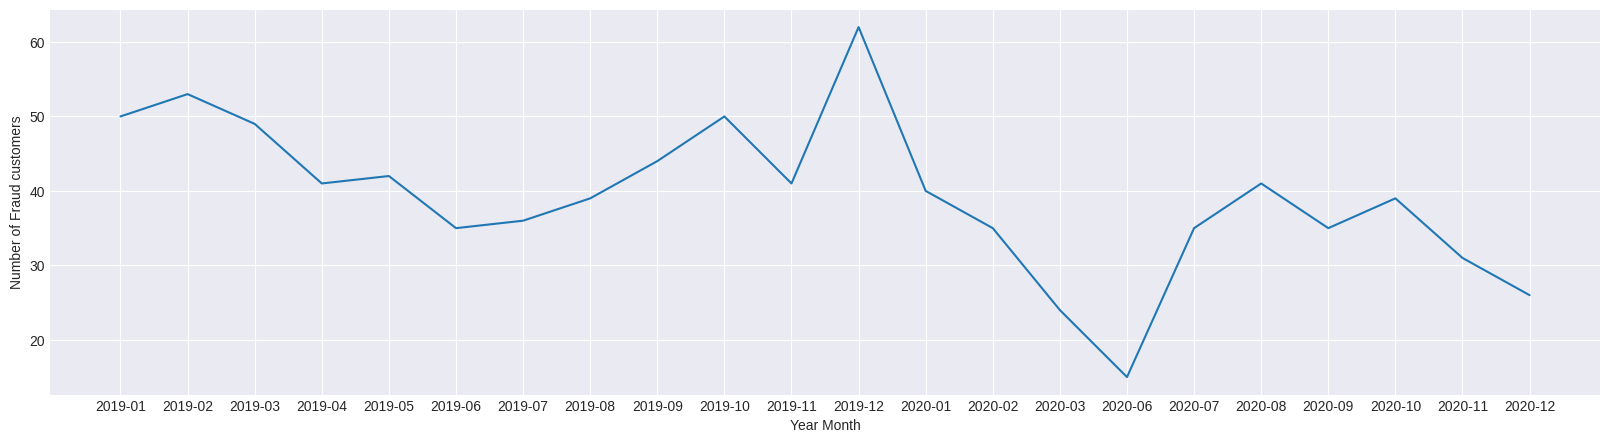

In [ ]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

Exploring Gender data:


In [ ]:
#creating the 'gender' distributed dataframe
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

#creating gender-fraud distribution
df_fraud_gender = df[['gender','trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,Transaction Count,gender_count,Transaction percentage
0,F,0.000000,881752,885934,99.527956
1,F,1.000000,4182,885934,0.472044
2,M,0.000000,727103,731183,99.442000
3,M,1.000000,4080,731183,0.558000


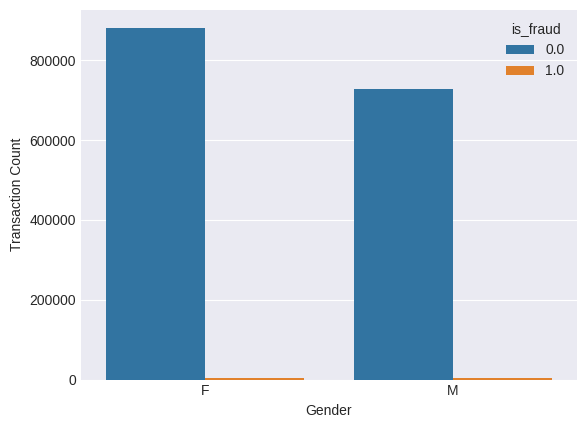

In [ ]:
sns.barplot(data=df_fraud_gender, y='Transaction Count', x='Gender', hue='is_fraud')

plt.show()

Exploring Age data:

In [ ]:
#let us first bin the age feature
for i in range(len(df.age)):
  if df.age[i] <= 30:
    df.age[i] = '< 30'
  elif df.age[i] > 30 and df.age[i] <= 45:
    df.age[i] = '30-45'
  elif df.age[i] > 45 and df.age[i] <= 60:
    df.age[i] = '46-60'
  elif df.age[i] > 60 and df.age[i] <= 75:
    df.age[i] = '61-75'
  else:
    df.age[i] = '> 75'

df.age.head()

0    30-45
1    30-45
2    46-60
3    46-60
4    30-45
Name: age, dtype: object

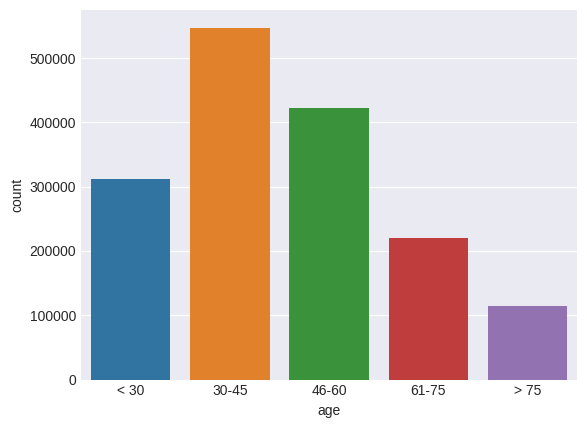

In [ ]:

# Convert 'age' column to categorical type
df['age'] = pd.Categorical(df['age'], categories=['< 30', '30-45', '46-60', '61-75', '> 75'], ordered=True)

# Plotting the age feature in the data
plot = sns.countplot(x='age', data=df)

plt.show()


In [ ]:
#constructing the age-transaction count distribution
df_age = df[['age','trans_num']].groupby(['age']).count().reset_index()
df_age.columns = ['age', 'age_count']

#creating the age-fraud distribution
df_fraud_age = df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
df_fraud_age.columns = ['age', 'is_fraud', 'Transaction count']

df_fraud_age = df_fraud_age.merge(df_age[['age', 'age_count']], how='inner', on='age')

df_fraud_age['Transaction percentage'] = (df_fraud_age['Transaction count']/df_fraud_age['age_count'])*100

df_fraud_age

,age,is_fraud,Transaction count,age_count,Transaction percentage
0,< 30,0.000000,310654,312306,99.471032
1,< 30,1.000000,1652,312306,0.528968
2,30-45,0.000000,545259,547416,99.605967
3,30-45,1.000000,2157,547416,0.394033
4,46-60,0.000000,420740,423084,99.445973
5,46-60,1.000000,2344,423084,0.554027
6,61-75,0.000000,218689,219983,99.411773
7,61-75,1.000000,1294,219983,0.588227
8,> 75,0.000000,113513,114328,99.287139
9,> 75,1.000000,815,114328,0.712861


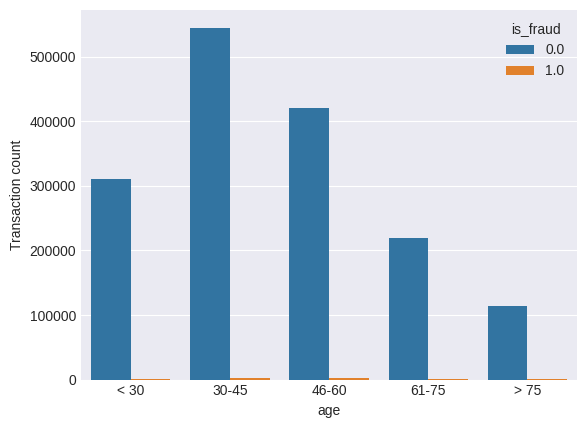

In [ ]:
sns.barplot(data=df_fraud_age, y='Transaction count', x='age', hue='is_fraud')

plt.show()

Exploring State data:

In [ ]:
df.state.nunique()

51

In [ ]:
#fetching states with high transaction frequecy
high_trans_states = df.state.value_counts().head(20).index.tolist()
print(high_trans_states)

['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO', 'MN', 'AR', 'NC', 'WI', 'SC', 'VA', 'KY', 'IN', 'IA', 'OK']


In [ ]:
100*df[df.state.isin(high_trans_states)].state.value_counts(normalize=True)

TX   10.965642
NY    9.663570
PA    9.243532
CA    6.537465
OH    5.388185
MI    5.322278
IL    5.052618
FL    4.942155
AL    4.749448
MO    4.447949
MN    3.689374
AR    3.604902
NC    3.513933
WI    3.380634
SC    3.379428
VA    3.379056
KY    3.323454
IN    3.202594
IA    3.137059
OK    3.076722
Name: state, dtype: float64

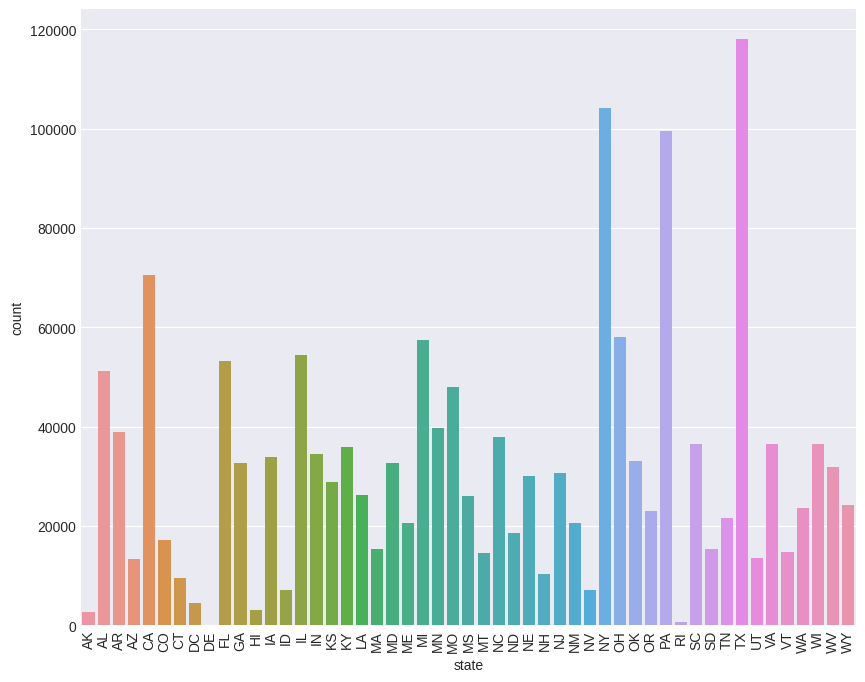

In [ ]:

# Convert 'state' column to categorical type
df['state'] = pd.Categorical(df['state'])

# Plotting the state feature
fig, ax = plt.subplots(figsize=(10, 8))
plot = sns.countplot(x='state', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()


In [ ]:
#constructing the state-transaction count distribution
df_state = df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,state,is_fraud,Transaction count,state_count,Transaction percentage
17,DE,1.000000,9,9,100.000000
79,RI,1.000000,15,647,2.318393
1,AK,1.000000,41,2568,1.596573
75,OR,1.000000,175,23060,0.758890
15,DC,1.000000,31,4493,0.689962
61,NH,1.000000,69,10232,0.674355
69,NY,1.000000,667,104104,0.640705
59,NE,1.000000,186,30125,0.617427
85,TN,1.000000,132,21666,0.609250
91,VA,1.000000,221,36402,0.607109


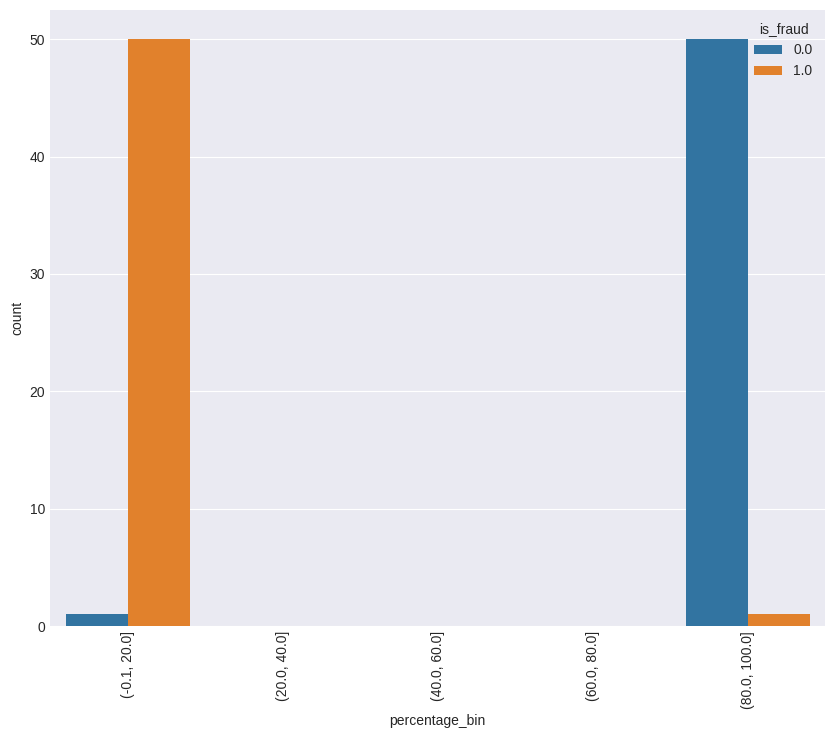

In [ ]:

# Perform binning based on 'Transaction percentage' column
num_bins = 5
df_fraud_state['percentage_bin'] = pd.cut(df_fraud_state['Transaction percentage'], bins=num_bins)

# Plotting the count of fraudulent transactions by percentage binning
fig, ax = plt.subplots(figsize=(10, 8))
plot = sns.countplot(x='percentage_bin', hue='is_fraud', data=df_fraud_state)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()


In [ ]:
#states with more than 75% fraudulent transactions
print('state with more than 75% fraudulent transactions:\n')
print(df_fraud_state.loc[(df_fraud_state.is_fraud == 1) & (df_fraud_state['Transaction percentage'] >= 75)].state)

state with more than 75% fraudulent transactions:

17    DE
Name: state, dtype: category
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']


Exploring 'city' and 'zip' variables:

In [ ]:
print('number of cities: ',df.city.nunique())
print('number of zip codes: ',df.zip.nunique())

number of cities:  892
number of zip codes:  968


In [ ]:
high_trans_cities = df.city.value_counts().head(20).index.tolist()
high_trans_zips = df.zip.value_counts().head(20).index.tolist()
print('high frequencies cities: ', high_trans_cities)
print('high frequencies zip codes: ', high_trans_zips)

high frequencies cities:  ['Birmingham', 'Meridian', 'Phoenix', 'San Antonio', 'Utica', 'Thomas', 'Warren', 'Cleveland', 'Conway', 'Arcadia', 'Houston', 'Brandon', 'Indianapolis', 'Naples', 'Burbank', 'Fulton', 'Philadelphia', 'Dallas', 'Orient', 'Detroit']
high frequencies zip codes:  [82514, 48088, 34112, 73754, 33872, 61454, 19149, 4287, 29819, 99160, 26292, 5461, 7060, 89512, 92585, 85020, 36749, 58569, 12419, 72042]


In [ ]:
#constructing the city-transaction count distribution
df_city = df[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']

#creating the city-fraud distribution
df_fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']

df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')

df_fraud_city['Transaction percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100

#viewing the top 20 cities with high fraudulent transaction volumes
df_fraud_city[df_fraud_city['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,city,is_fraud,Transaction count,city_count,Transaction percentage
959,Mount Vernon,1.000000,11,11,100.000000
1134,Phelps,1.000000,11,11,100.000000
1318,Seattle,1.000000,19,19,100.000000
673,Irvington,1.000000,8,8,100.000000
676,Isanti,1.000000,10,10,100.000000
1475,Vacaville,1.000000,7,7,100.000000
334,Crouse,1.000000,8,8,100.000000
974,Nanuet,1.000000,10,10,100.000000
962,Mountain City,1.000000,10,10,100.000000
706,Kaktovik,1.000000,12,12,100.000000


In [ ]:
#constructing the zip-transaction count distribution
df_zip = df[['zip','trans_num']].groupby(['zip']).count().reset_index()
df_zip.columns = ['zip', 'zip_count']

#creating the zip-fraud distribution
df_fraud_zip = df[['zip', 'trans_num', 'is_fraud']].groupby(['zip','is_fraud']).count().reset_index()
df_fraud_zip.columns = ['zip', 'is_fraud', 'Transaction count']

df_fraud_zip = df_fraud_zip.merge(df_zip[['zip', 'zip_count']], how='inner', on='zip')

df_fraud_zip['Transaction percentage'] = (df_fraud_zip['Transaction count']/df_fraud_zip['zip_count'])*100

#viewing the top 20 zip codes with high fraudulent transaction volumes
df_fraud_zip[df_fraud_zip['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,zip,is_fraud,Transaction count,zip_count,Transaction percentage
1725,99921,1.000000,14,14,100.000000
887,48436,1.000000,8,8,100.000000
974,53559,1.000000,10,10,100.000000
218,14532,1.000000,11,11,100.000000
208,14141,1.000000,12,12,100.000000
1003,54980,1.000000,10,10,100.000000
1008,55040,1.000000,10,10,100.000000
201,13795,1.000000,12,12,100.000000
1038,56367,1.000000,8,8,100.000000
373,22124,1.000000,9,9,100.000000


In [ ]:
#cities and zip codes with more fraudulent transactions
print('Cities with more than 75% fraudulent transactions:\n')
print(df_fraud_city.loc[(df_fraud_city.is_fraud == 1) & (df_fraud_city['Transaction percentage'] >= 75)].city.tolist())
print('\n\nZip codes with more than 75% fraudulent transactions:\n')
print(df_fraud_zip.loc[(df_fraud_zip.is_fraud == 1) & (df_fraud_zip['Transaction percentage'] >= 75)].zip.tolist())

Cities with more than 75% fraudulent transactions:

['Ashland', 'Beacon', 'Byesville', 'Chattanooga', 'Clarion', 'Claypool', 'Clinton', 'Coulee Dam', 'Craig', 'Crouse', 'Downey', 'Gaines', 'Granbury', 'Greenport', 'Grifton', 'Guthrie', 'Hubbell', 'Irvington', 'Isanti', 'Kaktovik', 'Karns City', 'Kirkwood', 'Kirtland', 'La Grande', 'Lexington', 'Madisonville', 'Marshall', 'Medford', 'Melville', 'Mineral', 'Morrowville', 'Morven', 'Mount Vernon', 'Mountain City', 'Nanuet', 'Noblesville', 'Norfolk', 'North East', 'Oakton', 'Orange Park', 'Phelps', 'Pleasant Hill', 'Rice', 'Ridge Spring', 'Roland', 'Seattle', 'Seligman', 'Senatobia', 'Springville', 'Vacaville', 'Walkertown', 'Wappapello', 'Waukau', 'West Frankfort', 'Wever', 'Winnsboro']


Zip codes with more than 75% fraudulent transactions:

[10018, 10533, 10553, 10954, 11747, 11763, 11944, 12207, 12508, 13795, 14141, 14532, 16041, 16214, 16428, 19947, 22124, 22204, 23117, 23523, 27051, 28033, 28119, 28412, 28530, 29129, 29180, 32065, 35

Exploring the Job feature:

In [ ]:
df.job.nunique()

496

In [ ]:
#fetching top 20 jobs with high transaction frequencies
high_trans_jobs = df.job.value_counts().head(20).index.tolist()
print(high_trans_jobs)

['Film/video editor', 'Exhibition designer', 'Surveyor, land/geomatics', 'Naval architect', 'Materials engineer', 'Designer, ceramics/pottery', 'Environmental consultant', 'Systems developer', 'Financial adviser', 'IT trainer', 'Chartered public finance accountant', 'Copywriter, advertising', 'Chief Executive Officer', 'Scientist, audiological', 'Paramedic', 'Comptroller', 'Sub', 'Agricultural consultant', 'Magazine features editor', 'Podiatrist']


In [ ]:
#constructing the zip-transaction count distribution
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']

#creating the zip-fraud distribution
df_fraud_job = df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Transaction percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100

#viewing the top 20 jobs with high fraudulent transaction volumes
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)


,job,is_fraud,Transaction count,job_count,Transaction percentage
459,Industrial buyer,1.000000,10,10,100.000000
378,Forest/woodland manager,1.000000,9,9,100.000000
428,Homeopath,1.000000,11,11,100.000000
66,Armed forces technical officer,1.000000,8,8,100.000000
39,Air traffic controller,1.000000,8,8,100.000000
504,Legal secretary,1.000000,12,12,100.000000
198,Contracting civil engineer,1.000000,7,7,100.000000
806,Solicitor,1.000000,11,11,100.000000
803,Software engineer,1.000000,11,11,100.000000
218,Dancer,1.000000,19,19,100.000000


In [ ]:
#job with more than one percent fraudulent transactions
df_fraud_job.loc[(df_fraud_job.is_fraud == 1) & (df_fraud_job['Transaction percentage'] >= 50)].job

2                  Accountant, chartered
39                Air traffic controller
66        Armed forces technical officer
94                  Broadcast journalist
112                      Careers adviser
198           Contracting civil engineer
218                               Dancer
323                       Engineer, site
328                      Engineer, water
378              Forest/woodland manager
428                            Homeopath
459                     Industrial buyer
462                  Information officer
504                      Legal secretary
601        Operational investment banker
626                    Personnel officer
767    Sales promotion account executive
796                          Ship broker
803                    Software engineer
806                            Solicitor
913                   Veterinary surgeon
Name: job, dtype: object

Exploring the 'category' feature:


In [ ]:
df.category.value_counts(normalize=True)

gas_transport    0.101513
grocery_pos      0.095050
home             0.094704
shopping_pos     0.089825
kids_pets        0.087351
shopping_net     0.075221
entertainment    0.072358
food_dining      0.070626
personal_care    0.070329
health_fitness   0.066083
misc_pos         0.061717
misc_net         0.048894
grocery_net      0.035001
travel           0.031330
Name: category, dtype: float64

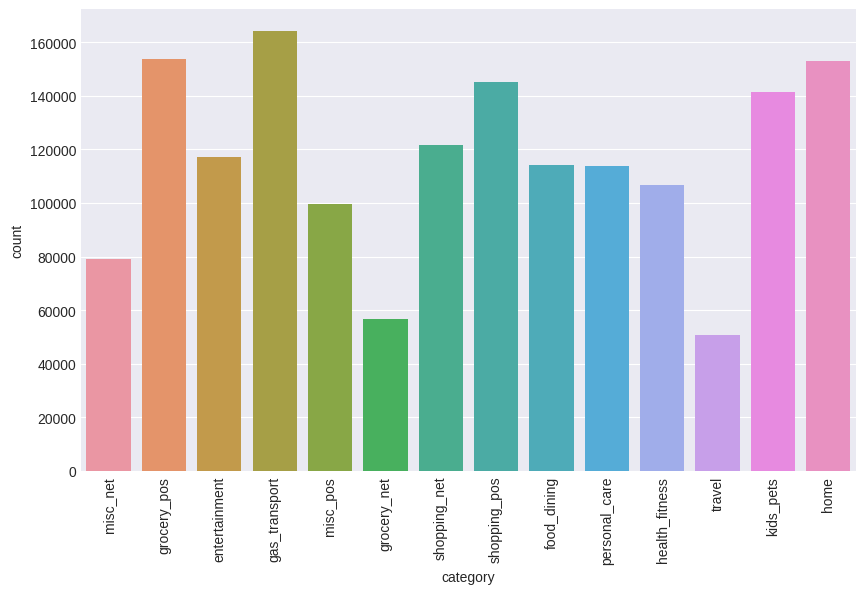

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Plot the category wise counts
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.countplot(x='category', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()


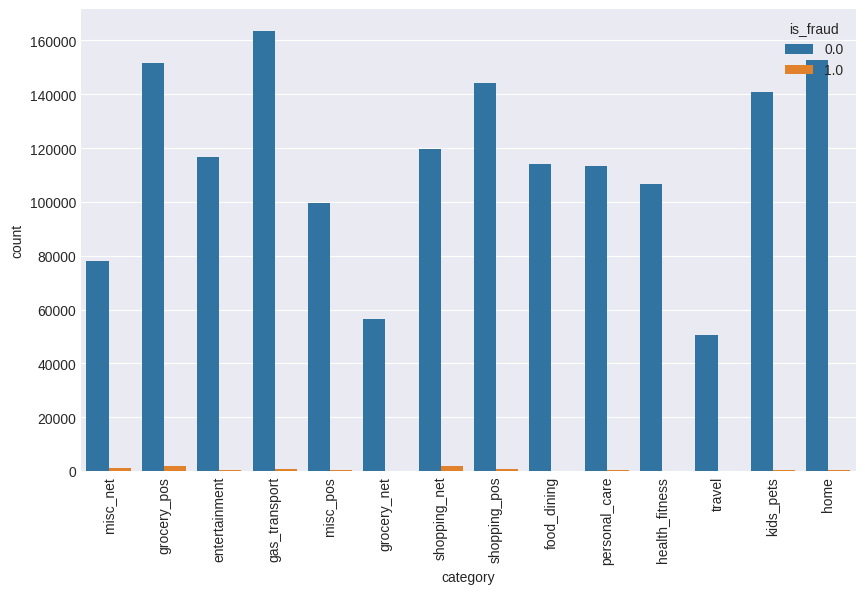

In [ ]:

# Let us see the number of fraudulent transactions in each category
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.countplot(x='category', hue='is_fraud', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()


In [ ]:
#constructing the category-transaction count distribution
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)

,category,is_fraud,Transaction count,category_count,Transaction percentage
23,shopping_net,1.000000,1910,121642,1.570181
17,misc_net,1.000000,1022,79067,1.292575
9,grocery_pos,1.000000,1904,153707,1.238720
25,shopping_pos,1.000000,890,145257,0.612707
5,gas_transport,1.000000,660,164158,0.402052
27,travel,1.000000,140,50664,0.276330
19,misc_pos,1.000000,270,99803,0.270533
7,grocery_net,1.000000,153,56601,0.270313
21,personal_care,1.000000,244,113730,0.214543
1,entertainment,1.000000,250,117011,0.213655


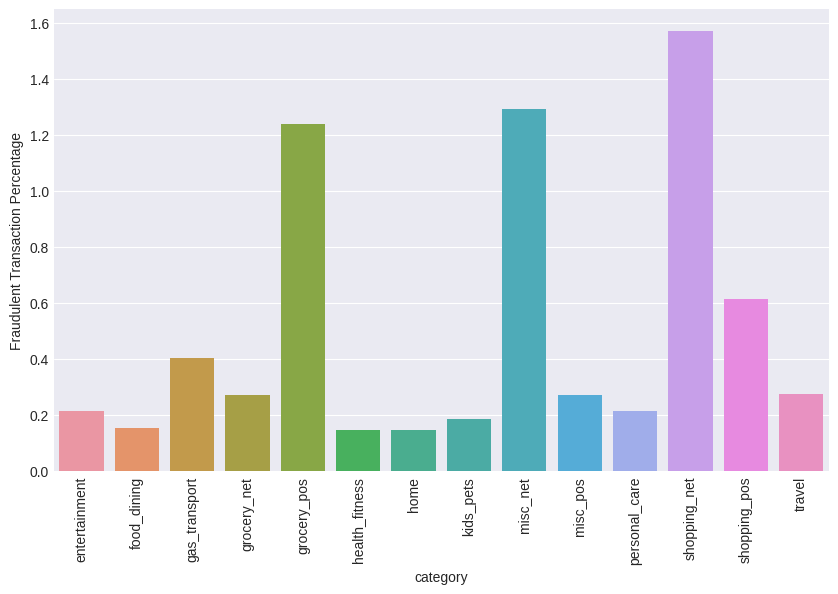

In [ ]:

# Calculate the percentage of fraudulent transactions for each category
fraudulent_percentages = df[df['is_fraud'] == 1].groupby('category').size() / df.groupby('category').size() * 100

# Plotting the fraudulent transactions percentage by binning
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.barplot(x=fraudulent_percentages.index, y=fraudulent_percentages.values, ax=ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylabel('Fraudulent Transaction Percentage')
plt.show()


In [ ]:

# Filter the 'df_fraud_category' DataFrame to get categories with more than one percent fraudulent transactions
fraudulent_categories = df_fraud_category.loc[
    (df_fraud_category['is_fraud'] == 1) & (df_fraud_category['Transaction percentage'] >= 1),
    'category'
].unique()

print("Categories with more than one percent fraudulent transactions:")
print(fraudulent_categories)


Categories with more than one percent fraudulent transactions:
['grocery_pos' 'misc_net' 'shopping_net']


In [ ]:
df_fraud_category.head()

,category,is_fraud,Transaction count,category_count,Transaction percentage
0,entertainment,0.000000,116761,117011,99.786345
1,entertainment,1.000000,250,117011,0.213655
2,food_dining,0.000000,114033,114210,99.845022
3,food_dining,1.000000,177,114210,0.154978
4,gas_transport,0.000000,163498,164158,99.597948


Exploring 'Merchant' Feature:

In [ ]:
df.merchant.nunique()

693

In [ ]:
high_trans_merchants = df.merchant.value_counts().head(20).index.tolist()
high_trans_merchants

['fraud_Kilback LLC',
 'fraud_Cormier LLC',
 'fraud_Schumm PLC',
 'fraud_Kuhn LLC',
 'fraud_Boyer PLC',
 'fraud_Dickinson Ltd',
 'fraud_Emard Inc',
 'fraud_Kling Inc',
 'fraud_Corwin-Collins',
 'fraud_Parisian and Sons',
 'fraud_Rodriguez Group',
 'fraud_Stroman, Hudson and Erdman',
 'fraud_Olson, Becker and Koch',
 'fraud_Bartoletti-Wunsch',
 'fraud_Eichmann, Bogan and Rodriguez',
 'fraud_Greenholt, Jacobi and Gleason',
 'fraud_Huels-Hahn',
 'fraud_Mraz-Herzog',
 'fraud_Erdman-Kertzmann',
 'fraud_Cummerata-Jones']

In [ ]:
#constructing the merchant-transaction count distribution
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant', 'merchant_count']

#creating the zip-fraud distribution
df_fraud_merchant = df[['merchant', 'trans_num', 'is_fraud']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['merchant', 'is_fraud', 'Transaction count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['merchant', 'merchant_count']], how='inner', on='merchant')

df_fraud_merchant['Transaction percentage'] = (df_fraud_merchant['Transaction count']/df_fraud_merchant['merchant_count'])*100

#viewing the top 20 merchant with high fraudulent transaction volumes
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,merchant,is_fraud,Transaction count,merchant_count,Transaction percentage
671,fraud_Kozey-Boehm,1.000000,50,2427,2.060157
490,"fraud_Herman, Treutel and Dickens",1.000000,33,1609,2.050963
1049,"fraud_Romaguera, Cruickshank and Greenholt",1.000000,48,2397,2.002503
689,fraud_Kuhic LLC,1.000000,49,2471,1.983003
882,"fraud_Mosciski, Ziemann and Farrell",1.000000,47,2471,1.902064
145,fraud_Boyer-Reichert,1.000000,46,2438,1.886792
1224,fraud_Terry-Huel,1.000000,47,2495,1.883768
769,fraud_Lemke-Gutmann,1.000000,46,2445,1.881391
1103,"fraud_Schmeler, Bashirian and Price",1.000000,45,2420,1.859504
474,fraud_Heathcote LLC,1.000000,43,2421,1.776126


In [ ]:
#number of merchants with more than one percent fraudulent transactions
len(df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 1)].merchant)

134

In [ ]:
#number of merchants with more than one percent fraudulent transactions
df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 2)].merchant

490              fraud_Herman, Treutel and Dickens
671                              fraud_Kozey-Boehm
1049    fraud_Romaguera, Cruickshank and Greenholt
Name: merchant, dtype: object

#Step - 4: Feature Encoding

In [ ]:
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(df.trans_day_of_week, prefix='day', drop_first=True)
#one-hot encoding the age variable
age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True)

In [ ]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot,age_onehot], axis=1)

df1.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,age_30-45,age_46-60,age_61-75,age_> 75
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495.000000,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018.000000,36.011293,-82.048315,0.000000,0,Tuesday,2019-01,30-45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149.000000,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044.000000,49.159047,-118.186462,0.000000,0,Tuesday,2019-01,30-45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154.000000,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051.000000,43.150704,-112.154481,0.000000,0,Tuesday,2019-01,46-60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939.000000,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076.000000,47.034331,-112.561071,0.000000,0,Tuesday,2019-01,46-60,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99.000000,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186.000000,38.674999,-78.632459,0.000000,0,Tuesday,2019-01,30-45,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
df1.drop([ 'cc_num', 'trans_num'], axis=1, inplace=True)
print(df1.shape)
df1.columns

(1617118, 44)


Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day_of_week',
       'trans_year_month', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'age_30-45', 'age_46-60', 'age_61-75', 'age_> 75'],
      dtype='object')

In [ ]:
df1.drop(['merchant','street','city','state','job',
          'category','gender','trans_day_of_week',
          'age'],axis=1, inplace=True)
df1.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_year_month',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'age_30-45', 'age_46-60', 'age_61-75',
       'age_> 75'],
      dtype='object')

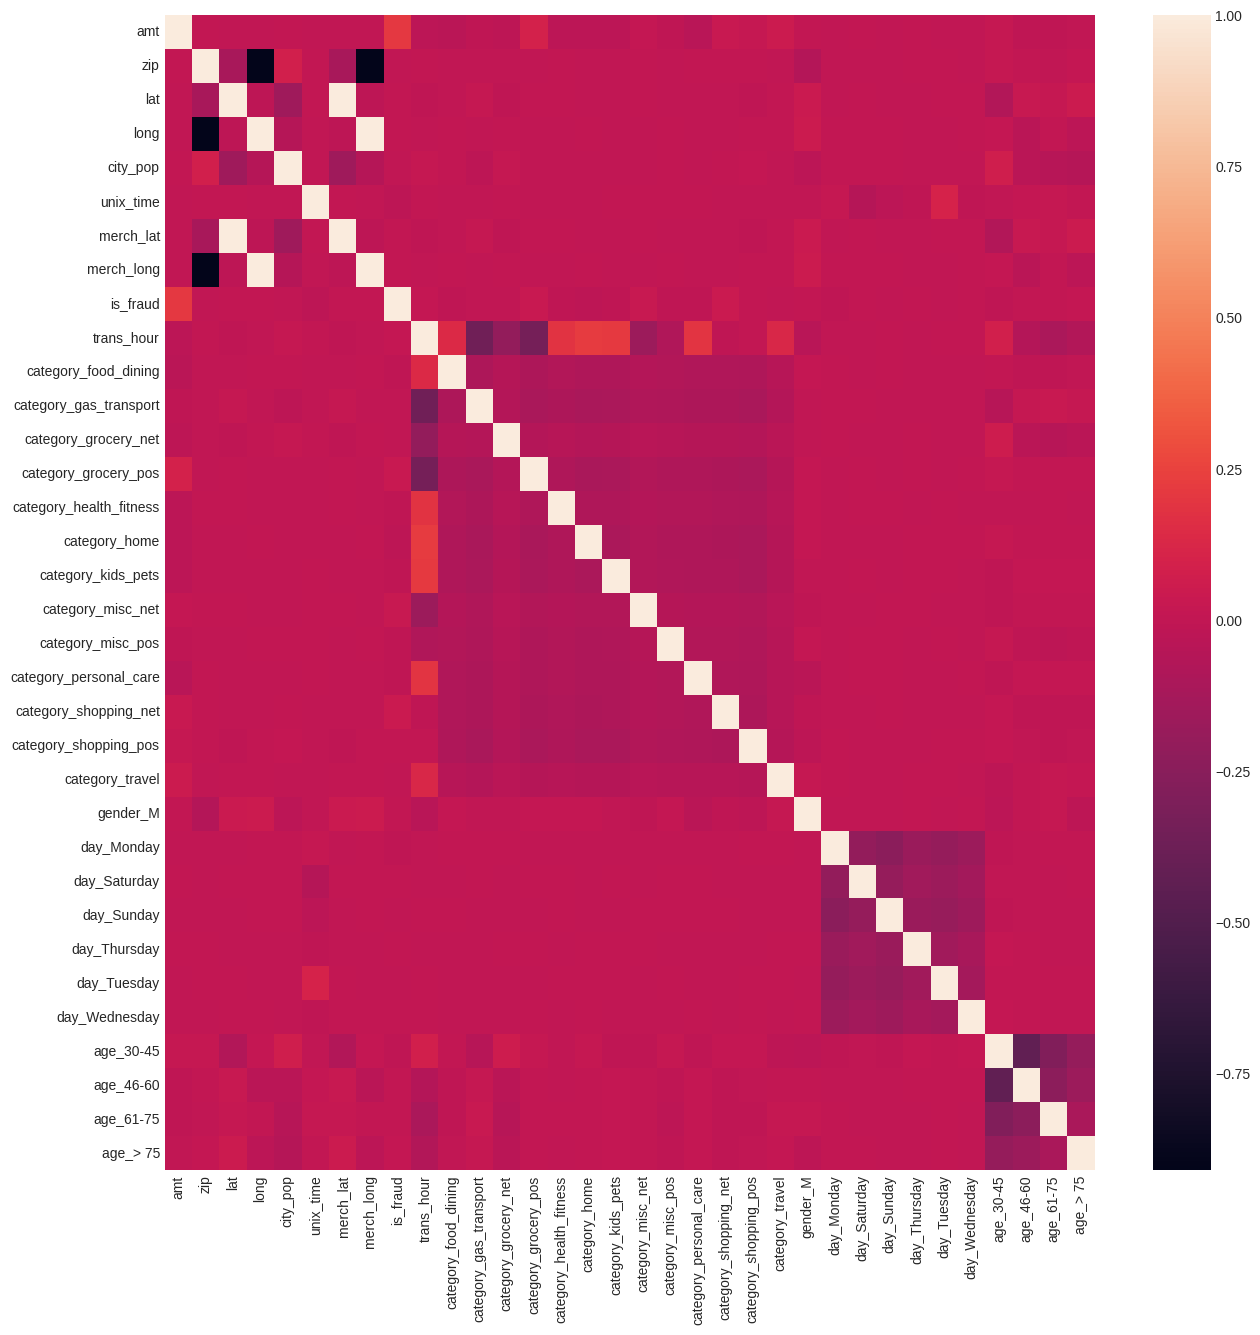

In [ ]:
#let us now check the correlations between the columns
df_random_under_corr = df1.corr()
#plotting the correlation heatplot
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()

In [ ]:
#function to return highly correlated column above a threshold
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [ ]:
#let us get the features with correlation above 85%
corr_features = correlation(df1,0.85)
corr_features

{'merch_lat', 'merch_long'}

#Step - 5: Implementing Algorithms

In [ ]:
#storing the number of values in each class
non_fraud_count, fraud_count = df1.is_fraud.value_counts()

In [ ]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df1.select_dtypes(include='number')
df_num.drop([ 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],
            axis=1, inplace=True)
df_num.columns

Index(['amt', 'zip', 'is_fraud', 'trans_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'age_30-45', 'age_46-60', 'age_61-75', 'age_> 75'],
      dtype='object')

In [ ]:
df_num.head(5)

,amt,zip,is_fraud,trans_hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,age_30-45,age_46-60,age_61-75,age_> 75
0,4.970000,28654,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,107.230000,99160,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,220.110000,83252,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,45.000000,59632,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,41.960000,24433,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617118 entries, 0 to 1617117
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1617118 non-null  float64
 1   zip                      1617118 non-null  int64  
 2   is_fraud                 1617117 non-null  float64
 3   trans_hour               1617118 non-null  int64  
 4   category_food_dining     1617118 non-null  uint8  
 5   category_gas_transport   1617118 non-null  uint8  
 6   category_grocery_net     1617118 non-null  uint8  
 7   category_grocery_pos     1617118 non-null  uint8  
 8   category_health_fitness  1617118 non-null  uint8  
 9   category_home            1617118 non-null  uint8  
 10  category_kids_pets       1617118 non-null  uint8  
 11  category_misc_net        1617118 non-null  uint8  
 12  category_misc_pos        1617118 non-null  uint8  
 13  category_personal_care   1617118 non-null 

In [ ]:
df_num.to_csv('processed.csv')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.model_selection import learning_curve


In [ ]:
# Load your processed dataset
df_num = pd.read_csv('processed.csv')

# Input-output split
X = df_num.drop(['is_fraud'], axis=1)
y = df_num['is_fraud']

# Check for missing values in y
missing_values = y.isnull().sum()

if missing_values > 0:
    # Handle missing values, e.g., by removing corresponding rows or imputing values

    df_num.dropna(subset=['is_fraud'], inplace=True)

# Separate X and y after handling missing values
X = df_num.drop(['is_fraud'], axis=1)
y = df_num['is_fraud']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)




#Implementing Deep Learning Models

Epoch 1/10
40222/40222 [==============================] - 315s 8ms/step - loss: 0.1169 - accuracy: 0.9523 - val_loss: 0.0680 - val_accuracy: 0.9719
Epoch 2/10
40222/40222 [==============================] - 335s 8ms/step - loss: 0.0819 - accuracy: 0.9666 - val_loss: 0.0563 - val_accuracy: 0.9772
Epoch 3/10
40222/40222 [==============================] - 326s 8ms/step - loss: 0.0748 - accuracy: 0.9694 - val_loss: 0.0525 - val_accuracy: 0.9780
Epoch 4/10
40222/40222 [==============================] - 333s 8ms/step - loss: 0.0706 - accuracy: 0.9711 - val_loss: 0.0525 - val_accuracy: 0.9789
Epoch 5/10
40222/40222 [==============================] - 319s 8ms/step - loss: 0.0675 - accuracy: 0.9724 - val_loss: 0.0469 - val_accuracy: 0.9814
Epoch 6/10
40222/40222 [==============================] - 318s 8ms/step - loss: 0.0653 - accuracy: 0.9732 - val_loss: 0.0473 - val_accuracy: 0.9805
Epoch 7/10
40222/40222 [==============================] - 327s 8ms/step - loss: 0.0636 - accuracy: 0.9739 - val_

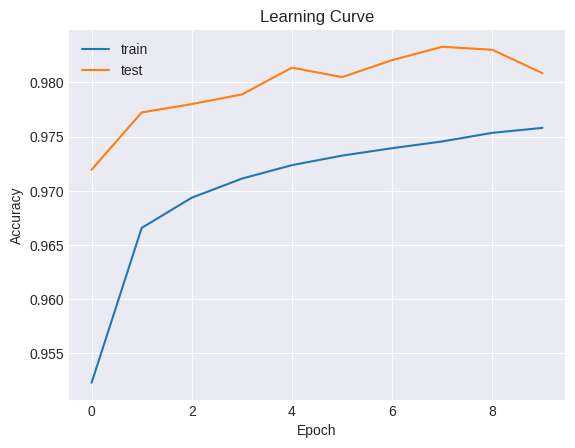

In [ ]:

# Shuffle the data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Reshape the data for CNN
X_reshaped = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_resampled, test_size=0.2, random_state=42)

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Prediction for CNN
y_pred_cnn_prob = model_cnn.predict(X_test)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)

# Calculate accuracy
total_accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
testing_accuracy_cnn = accuracy_score(y_test, y_pred_cnn)

# Classification report
classification_report_cnn = classification_report(y_test, y_pred_cnn)

# Confusion matrix
confusion_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Learning curve
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

plot_learning_curve(history_cnn)




In [ ]:


# Classification report for CNN
from sklearn.metrics import classification_report

classification_report_cnn = classification_report(y_test, y_pred_cnn)
print("Classification Report for CNN:\n", classification_report_cnn)

# Confusion matrix for CNN
from sklearn.metrics import confusion_matrix

confusion_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix for CNN:\n", confusion_matrix_cnn)




Classification Report for CNN:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    321892
         1.0       0.98      0.98      0.98    321650

    accuracy                           0.98    643542
   macro avg       0.98      0.98      0.98    643542
weighted avg       0.98      0.98      0.98    643542

Confusion Matrix for CNN:
 [[316492   5400]
 [  6927 314723]]


Epoch 1/10
46069/46069 [==============================] - 168s 4ms/step - loss: 0.0546 - accuracy: 0.9786 - val_loss: 0.0385 - val_accuracy: 0.9854
Epoch 2/10
46069/46069 [==============================] - 161s 4ms/step - loss: 0.0339 - accuracy: 0.9876 - val_loss: 0.0287 - val_accuracy: 0.9897
Epoch 3/10
46069/46069 [==============================] - 166s 4ms/step - loss: 0.0291 - accuracy: 0.9897 - val_loss: 0.0269 - val_accuracy: 0.9906
Epoch 4/10
46069/46069 [==============================] - 163s 4ms/step - loss: 0.0263 - accuracy: 0.9910 - val_loss: 0.0243 - val_accuracy: 0.9917
Epoch 5/10
46069/46069 [==============================] - 166s 4ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0221 - val_accuracy: 0.9926
Epoch 6/10
46069/46069 [==============================] - 163s 4ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0220 - val_accuracy: 0.9929
Epoch 7/10
46069/46069 [==============================] - 167s 4ms/step - loss: 0.0218 - accuracy: 0.9929 - val_

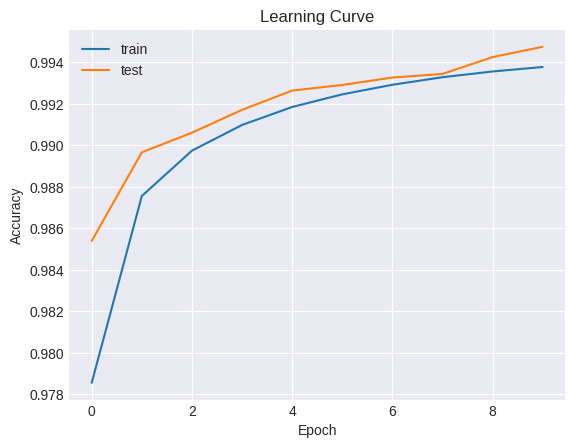

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for RNN
X_reshaped_rnn = X_resampled.reshape(X_resampled.shape[0], 1, X_resampled.shape[1])

# Train-test split
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_reshaped_rnn, y_resampled, test_size=0.2, random_state=42)

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, activation='relu', input_shape=(1, X_resampled.shape[1])))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=64, validation_data=(X_test_rnn, y_test_rnn))

# Prediction for RNN
y_pred_rnn_prob = model_rnn.predict(X_test_rnn)
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype(int)

# Calculate accuracy
total_accuracy_rnn = accuracy_score(y_test_rnn, y_pred_rnn)
testing_accuracy_rnn = accuracy_score(y_test_rnn, y_pred_rnn)

# Classification report for RNN
classification_report_rnn = classification_report(y_test_rnn, y_pred_rnn)
print("Classification Report for RNN:\n", classification_report_rnn)

# Confusion matrix for RNN
confusion_matrix_rnn = confusion_matrix(y_test_rnn, y_pred_rnn)
print("Confusion Matrix for RNN:\n", confusion_matrix_rnn)

# Learning curve
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

plot_learning_curve(history_rnn)


#Implementing Machine Learning Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

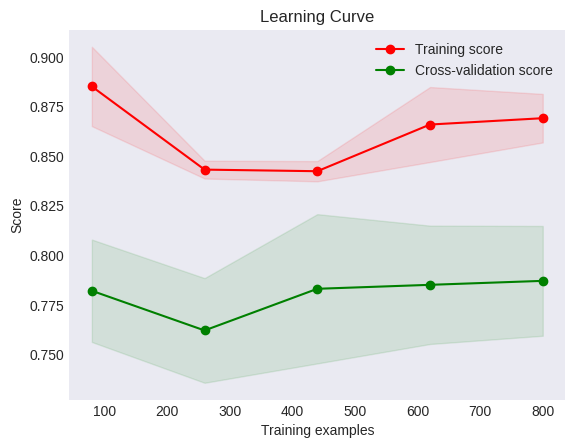

K-Nearest Neighbors Accuracy: 0.992
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       497
         1.0       0.98      1.00      0.99       503

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

K-Nearest Neighbors Confusion Matrix:
 [[489   8]
 [  0 503]]


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Subset of data for learning curves
subset_size = 1000  # Choose a reasonable subset size
X_subset = X_test[:subset_size]
y_subset = y_test[:subset_size]

# Function to evaluate model
def evaluate_model_with_learning_curve(model, X, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y_true, cv=5, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 5)
    )

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    return accuracy, classification_rep, confusion_mat

# Evaluate model with learning curve
accuracy, class_rep, conf_mat = evaluate_model_with_learning_curve(knn_model, X_subset, y_subset, knn_model.predict(X_subset))

# Print results
print("K-Nearest Neighbors Accuracy:", accuracy)
print("K-Nearest Neighbors Classification Report:\n", class_rep)
print("K-Nearest Neighbors Confusion Matrix:\n", conf_mat)


#Logistic Regression Model

In [ ]:


# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracies
print("Accuracy for Logistic Regression:", accuracy_lr)

# Classification report and confusion matrix for Logistic Regression model
def evaluate_model(model, y_true, y_pred):
    classification_rep = classification_report(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return classification_rep, confusion_mat

classifiers = [lr_model]
classifier_names = [ "Logistic Regression"]

for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    class_rep, conf_mat = evaluate_model(clf, y_test, y_pred)
    print(clf_name + " Classification Report:\n", class_rep)
    print(clf_name + " Confusion Matrix:\n", conf_mat)
    print("\n")




Accuracy for Logistic Regression: 0.820259992565439
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83    368849
           1       0.87      0.76      0.81    368249

    accuracy                           0.82    737098
   macro avg       0.83      0.82      0.82    737098
weighted avg       0.83      0.82      0.82    737098

Logistic Regression Confusion Matrix:
 [[325782  43067]
 [ 89419 278830]]




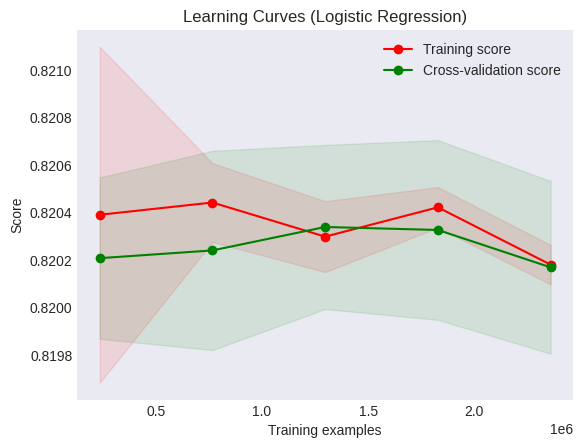

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function for plotting learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Logistic Regression
lr_model = LogisticRegression(random_state=42)
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(lr_model, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


#Decision Tree Model

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Print accuracies
print("Accuracy for Decision Tree:", accuracy_dt)

# Classification report and confusion matrix for Decision Tree model
def evaluate_model(model, y_true, y_pred):
    classification_rep = classification_report(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return classification_rep, confusion_mat

classifiers = [dt_model]
classifier_names = [ "Decision Tree"]

for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    class_rep, conf_mat = evaluate_model(clf, y_test, y_pred)
    print(clf_name + " Classification Report:\n", class_rep)
    print(clf_name + " Confusion Matrix:\n", conf_mat)
    print("\n")

Accuracy for Decision Tree: 0.9978605287220966
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368849
           1       1.00      1.00      1.00    368249

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098

Decision Tree Confusion Matrix:
 [[367843   1006]
 [   571 367678]]




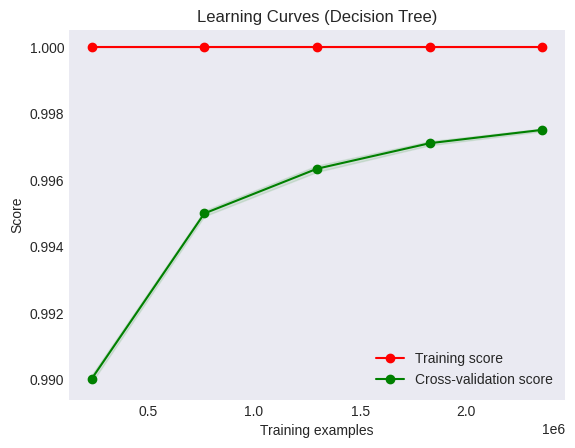

In [ ]:
# Define a function for plotting learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
title = "Learning Curves (Decision Tree)"
plot_learning_curve(dt_model, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Random Forest Model

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Accuracy for Random Forest:", accuracy_rf)

# Classification report and confusion matrix for Random Forest model
def evaluate_model(model, y_true, y_pred):
    classification_rep = classification_report(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return classification_rep, confusion_mat

classifiers = [rf_model]
classifier_names = ["Random Forest"]

for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    class_rep, conf_mat = evaluate_model(clf, y_test, y_pred)
    print(clf_name + " Classification Report:\n", class_rep)
    print(clf_name + " Confusion Matrix:\n", conf_mat)
    print("\n")

Accuracy for Random Forest: 0.9991195200638179
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368849
           1       1.00      1.00      1.00    368249

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098

Random Forest Confusion Matrix:
 [[368342    507]
 [   142 368107]]




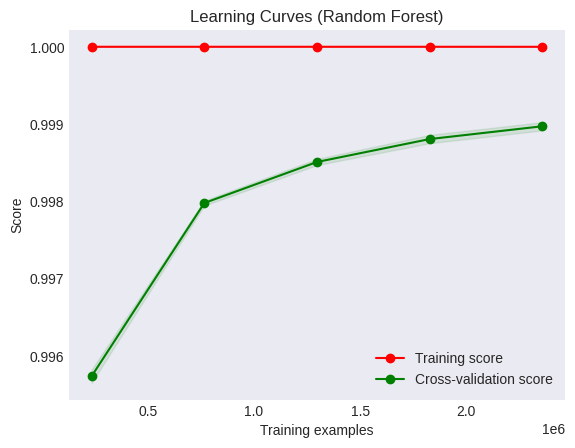

In [ ]:
# Define a function for plotting learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


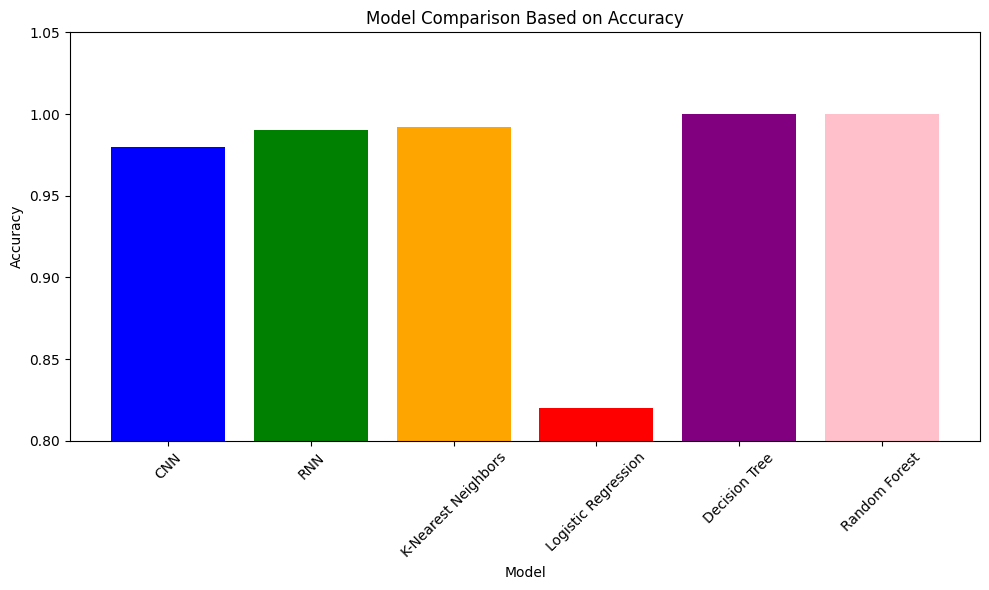

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['CNN', 'RNN', 'K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.98, 0.99, 0.992, 0.82, 1.0, 1.0]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.ylim(0.8, 1.05)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


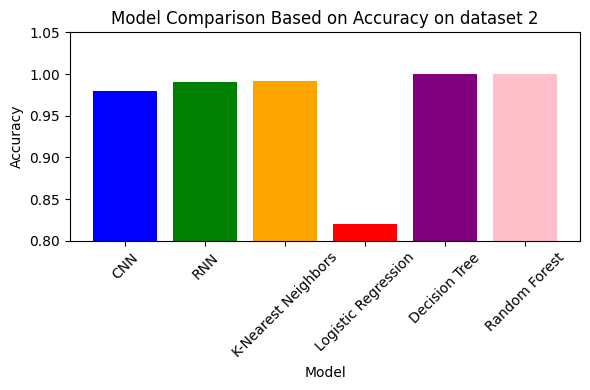

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['CNN', 'RNN', 'K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.98, 0.99, 0.992, 0.82, 1.0, 1.0]

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy on dataset 2')
plt.ylim(0.8, 1.05)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

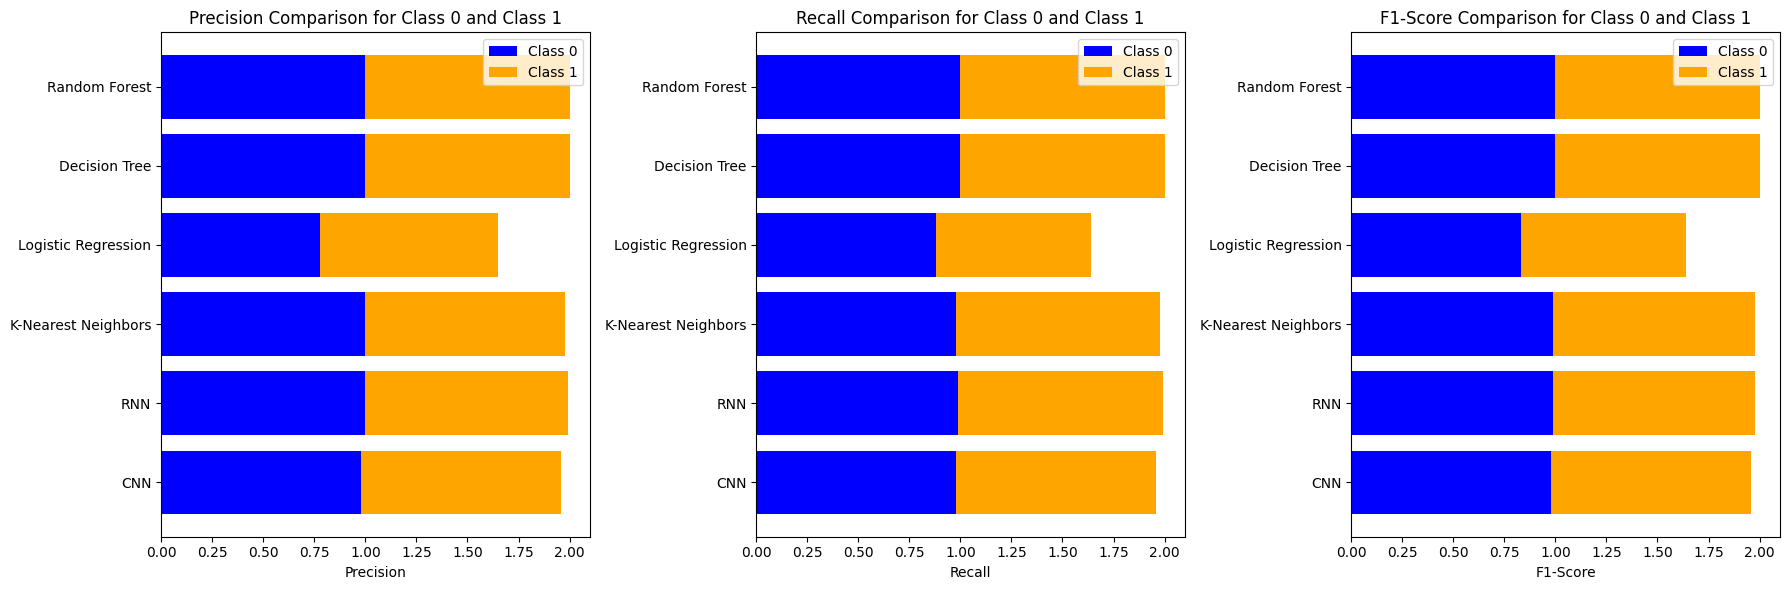

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['CNN', 'RNN', 'K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Metrics data
precision_class0 = [0.98, 1.0, 1.0, 0.78, 1.0, 1.0]
precision_class1 = [0.98, 0.99, 0.98, 0.87, 1.0, 1.0]
recall_class0 = [0.98, 0.99, 0.98, 0.88, 1.0, 1.0]
recall_class1 = [0.98, 1.0, 1.0, 0.76, 1.0, 1.0]
f1_score_class0 = [0.98, 0.99, 0.99, 0.83, 1.0, 1.0]
f1_score_class1 = [0.98, 0.99, 0.99, 0.81, 1.0, 1.0]

# Create subplots for each metric
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision for Class 0 and Class 1
axs[0].barh(models, precision_class0, label='Class 0', color='blue')
axs[0].barh(models, precision_class1, label='Class 1', color='orange', left=precision_class0)
axs[0].set_xlabel('Precision')
axs[0].set_title('Precision Comparison for Class 0 and Class 1')
axs[0].legend()

# Plot Recall for Class 0 and Class 1
axs[1].barh(models, recall_class0, label='Class 0', color='blue')
axs[1].barh(models, recall_class1, label='Class 1', color='orange', left=recall_class0)
axs[1].set_xlabel('Recall')
axs[1].set_title('Recall Comparison for Class 0 and Class 1')
axs[1].legend()

# Plot F1-Score for Class 0 and Class 1
axs[2].barh(models, f1_score_class0, label='Class 0', color='blue')
axs[2].barh(models, f1_score_class1, label='Class 1', color='orange', left=f1_score_class0)
axs[2].set_xlabel('F1-Score')
axs[2].set_title('F1-Score Comparison for Class 0 and Class 1')
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
